<a href="https://colab.research.google.com/github/SmrutiNIT/PythonBasics-May-29-Batch/blob/main/Assignment_12_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("/content/SalaryData_Train.csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
train.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
len(train.age),len(train.columns)

(30161, 14)

In [5]:
train.shape

(30161, 14)

In [6]:
test = pd.read_csv("/content/SalaryData_Train.csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test.shape

(30161, 14)

Combining the Both test and train split and then going to preform navie bayes classifier 

In [9]:
data =pd.merge(train,test)

In [10]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Data Preprocessing

In [11]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,42727.000000,42727.000000,42727.000000,42727.000000,42727.000000
mean,36.890116,10.007279,783.081120,63.048377,40.225010
std,12.807097,2.328712,6285.865821,343.799968,10.909957
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,26.000000,9.000000,0.000000,0.000000,40.000000
50%,36.000000,9.000000,0.000000,0.000000,40.000000
75%,46.000000,11.000000,0.000000,0.000000,40.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
data.info

<bound method DataFrame.info of        age          workclass      education  educationno  \
0       39          State-gov      Bachelors           13   
1       50   Self-emp-not-inc      Bachelors           13   
2       38            Private        HS-grad            9   
3       53            Private           11th            7   
4       28            Private      Bachelors           13   
...    ...                ...            ...          ...   
42722   53            Private        Masters           14   
42723   22            Private   Some-college           10   
42724   27            Private     Assoc-acdm           12   
42725   58            Private        HS-grad            9   
42726   52       Self-emp-inc        HS-grad            9   

             maritalstatus          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2            

In [14]:
data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [15]:
def count_plot(data, columns):
    plt.figure(figsize=(15, 10))
    for indx, var  in enumerate(columns):
        plt.subplot(5,3 , indx+1)
        g = sns.countplot(data[var], hue= data['Salary'])
    plt.tight_layout()
features = data.columns.tolist()
features.remove('Salary')
features

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

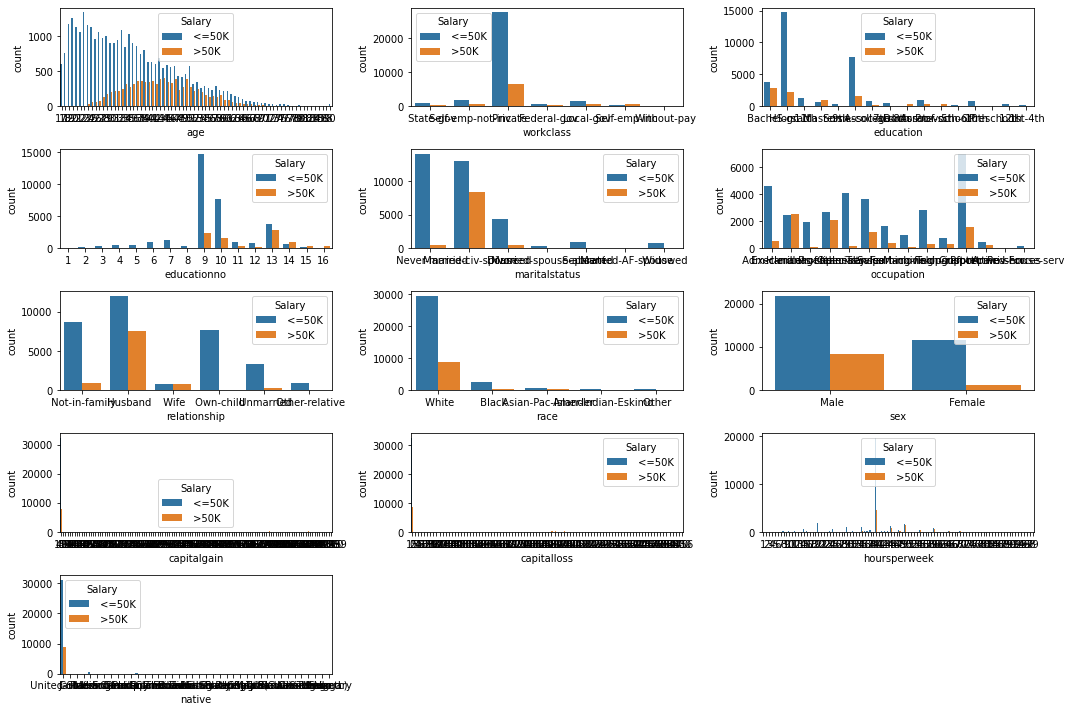

In [17]:
count_plot(data,features)

In [18]:
for var in features:
    print(data[var].value_counts().sort_values(ascending=False) / data.shape[0])
    print('=' * 30)
    print()

23    0.031643
33    0.031011
35    0.030519
20    0.029466
37    0.028741
        ...   
82    0.000164
83    0.000117
88    0.000070
85    0.000070
86    0.000023
Name: age, Length: 72, dtype: float64

 Private             0.805416
 Self-emp-not-inc    0.062747
 Local-gov           0.051139
 State-gov           0.031198
 Self-emp-inc        0.026447
 Federal-gov         0.022726
 Without-pay         0.000328
Name: workclass, dtype: float64

 HS-grad         0.399139
 Some-college    0.218995
 Bachelors       0.157137
 Masters         0.041964
 Assoc-voc       0.033211
 11th            0.033094
 Assoc-acdm      0.024341
 10th            0.022702
 7th-8th         0.013879
 Prof-school     0.013200
 9th             0.010930
 12th            0.010321
 Doctorate       0.009338
 5th-6th         0.006975
 1st-4th         0.003674
 Preschool       0.001100
Name: education, dtype: float64

9     0.399139
10    0.218995
13    0.157137
14    0.041964
11    0.033211
7     0.033094
12    0.024341

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score,classification_report
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter

Ordinal and Label Encodings for Independent Feature

In [20]:
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(data[features])
data_encoded = pd.DataFrame(data_encoded, columns=features)
data_encoded

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,22.0,5.0,9.0,12.0,4.0,0.0,1.0,4.0,1.0,24.0,0.0,39.0,37.0
1,33.0,4.0,9.0,12.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,12.0,37.0
2,21.0,2.0,11.0,8.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,39.0,37.0
3,36.0,2.0,1.0,6.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,39.0,37.0
4,11.0,2.0,9.0,12.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,39.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42722,36.0,2.0,12.0,13.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,39.0,37.0
42723,5.0,2.0,15.0,9.0,4.0,10.0,1.0,4.0,1.0,0.0,0.0,39.0,37.0
42724,10.0,2.0,7.0,11.0,2.0,12.0,5.0,4.0,0.0,0.0,0.0,37.0,37.0
42725,41.0,2.0,11.0,8.0,6.0,0.0,4.0,4.0,0.0,0.0,0.0,39.0,37.0


In [21]:
encoder1=LabelEncoder()
data_encoded1 =encoder1.fit_transform(data['Salary'])
data_encoded1

array([0, 0, 0, ..., 0, 0, 1])

In [22]:
data_encoded['Salary']=data_encoded1

In [23]:
data_encoded

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22.0,5.0,9.0,12.0,4.0,0.0,1.0,4.0,1.0,24.0,0.0,39.0,37.0,0
1,33.0,4.0,9.0,12.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,12.0,37.0,0
2,21.0,2.0,11.0,8.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,39.0,37.0,0
3,36.0,2.0,1.0,6.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,39.0,37.0,0
4,11.0,2.0,9.0,12.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,39.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42722,36.0,2.0,12.0,13.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,39.0,37.0,1
42723,5.0,2.0,15.0,9.0,4.0,10.0,1.0,4.0,1.0,0.0,0.0,39.0,37.0,0
42724,10.0,2.0,7.0,11.0,2.0,12.0,5.0,4.0,0.0,0.0,0.0,37.0,37.0,0
42725,41.0,2.0,11.0,8.0,6.0,0.0,4.0,4.0,0.0,0.0,0.0,39.0,37.0,0


In [24]:
data_encoded.shape

(42727, 14)

Train Test split

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
X=data_encoded.iloc[:,0:-1]
y=data_encoded['Salary']

In [27]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=10)

In [28]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
20949,21.0,2.0,15.0,9.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0,39.0,37.0
7361,6.0,2.0,9.0,12.0,4.0,7.0,3.0,4.0,0.0,0.0,0.0,29.0,37.0
42497,45.0,6.0,15.0,9.0,2.0,0.0,5.0,4.0,0.0,0.0,0.0,15.0,37.0
13653,16.0,2.0,9.0,12.0,2.0,7.0,5.0,4.0,0.0,0.0,0.0,39.0,37.0
39139,4.0,2.0,11.0,8.0,4.0,6.0,1.0,4.0,1.0,0.0,0.0,34.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22063,14.0,2.0,11.0,8.0,4.0,7.0,1.0,4.0,1.0,0.0,0.0,39.0,37.0
5769,20.0,2.0,15.0,9.0,6.0,2.0,4.0,4.0,1.0,0.0,0.0,39.0,37.0
14257,6.0,2.0,15.0,9.0,4.0,12.0,3.0,4.0,1.0,0.0,0.0,39.0,37.0
28067,22.0,2.0,9.0,12.0,0.0,3.0,4.0,4.0,0.0,0.0,0.0,49.0,37.0


In [29]:
X_test.shape,X_train.shape,y_train.shape,y_test.shape

((12819, 13), (29908, 13), (29908,), (12819,))

In [30]:
model =MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [31]:
y_pred =model.predict(X_test)

In [32]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
count_misclassified = (y_test != y_pred).sum()
count_misclassified

2614

In [34]:
accuracy =accuracy_score(y_test,y_pred)
print(accuracy)

0.7960839379046728


In [35]:
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.80


Precision Recall and F1 score

In [36]:
print("precision :",precision_score(y_test,y_pred,average ='micro'))
print("f1 Score:",f1_score(y_test,y_pred,average='micro'))
print("recall score:",recall_score(y_test,y_pred,average ='micro'))

precision : 0.7960839379046728
f1 Score: 0.7960839379046728
recall score: 0.7960839379046728


Classification Report

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      9996
           1       0.59      0.23      0.34      2823

    accuracy                           0.80     12819
   macro avg       0.70      0.59      0.61     12819
weighted avg       0.77      0.80      0.76     12819



GaussianNB Claasifier

In [38]:
model1=GaussianNB()
model1.fit(X_train,y_train)
y_pred_gnb =model1.predict(X_test)

In [39]:
y_pred_gnb

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
count_misclassifed =( y_test != y_pred_gnb ).sum()
count_misclassifed

2267

more missclassifications in GassianNB when compared to MultinomialNB

In [41]:
print("Recall score : ", recall_score(y_test, y_pred_gnb , average='micro'))
print("Precision score : ",precision_score(y_test, y_pred_gnb , average='micro'))
print("F1 score : ",f1_score(y_test, y_pred_gnb , average='micro'))

Recall score :  0.8231531320695842
Precision score :  0.8231531320695842
F1 score :  0.8231531320695842
